In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\chinm\\Downloads\\archive (8)\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Count the number of fraudulent and non-fraudulent transactions
fraudulent = len(df[df['Class'] == 1])
non_fraudulent = len(df[df['Class'] == 0])

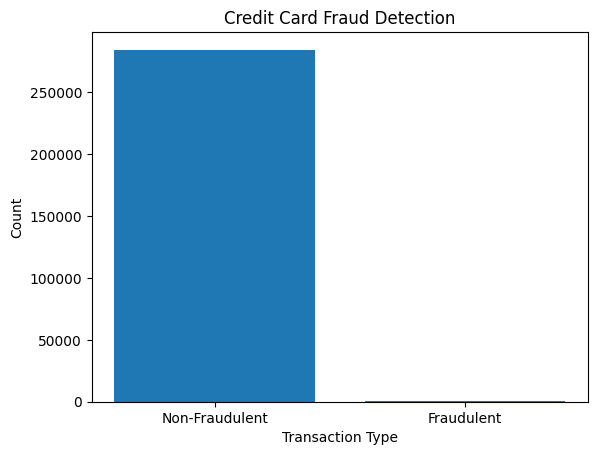

In [4]:
# Create a bar plot
plt.bar(['Non-Fraudulent', 'Fraudulent'], [non_fraudulent,fraudulent])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Credit Card Fraud Detection')
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_spli
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

In [16]:
# Preprocessing Function
def preprocess_data(df):
    X = df.drop('Class', axis=1)
    y = df['Class']
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

In [17]:
# Logistic Regression Model
def train_model(X_train, y_train):
    """Train a Logistic Regression model with increased max_iter."""
    model = LogisticRegression(max_iter=1000, solver='lbfgs')  # Increase max_iter to 1000
    model.fit(X_train, y_train)
    return model

In [20]:
# Main Function
def main():
    # Load your dataset and preprocess it
    data = pd.read_csv('creditcard.csv')
    X, y = preprocess_data(data)
    
    # Handle class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
    
    # Train the Logistic Regression model
    model = train_model(X_train, y_train)
        # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

if __name__ == "__main__":
        main()

Test Accuracy: 95.01%


In [24]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Load Dataset
data = pd.read_csv('creditcard.csv')

# Data Preprocessing
X = data.drop('Class', axis=1)  # Features
y = data['Class']               # Target (fraud or not)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

# Build a simple Neural Network model
model = Sequential()
model.add(Dense(units=16, input_dim=X_train.shape[1], activation='relu'))  # Input + first layer
model.add(Dense(units=8, activation='relu'))                               # Hidden layer
model.add(Dense(units=1, activation='sigmoid'))                            # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred)*100)


Epoch 1/5
3116/3116 [==============================] - 5s 1ms/step - loss: 0.0345 - accuracy: 0.9889
Epoch 2/5
3116/3116 [==============================] - 4s 1ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 3/5
3116/3116 [==============================] - 4s 1ms/step - loss: 0.0029 - accuracy: 0.9995
Epoch 4/5
3116/3116 [==============================] - 3s 833us/step - loss: 0.0027 - accuracy: 0.9995
Epoch 5/5
2671/2671 [==============================] - 2s 582us/step
Test Accuracy: 99.93211848834895
